# Testing NHSPI for vaccine acceptance ? 

__Initial Vaccine Dataset__ : [Notebook](https://github.com/tigboatnc/Covid-Policy-Effectiveness/blob/main/notebooks/vaccine-data-process.ipynb)

## Vaccine Dataset

In [1]:
import pandas as pd
from scipy.stats import zscore

In [2]:
vacDF = pd.read_csv('./data/state_vac.csv')

In [3]:
vacDF.columns

Index(['Unnamed: 0', 'S4_people_vaccinated_per_hundred',
       'S4_people_fully_vaccinated_per_hundred', 'S4_people_vaccinated',
       'S4_people_fully_vaccinated', 'S3_people_vaccinated_per_hundred',
       'S3_people_fully_vaccinated_per_hundred', 'S3_people_vaccinated',
       'S3_people_fully_vaccinated', 'S2_people_vaccinated_per_hundred',
       'S2_people_fully_vaccinated_per_hundred', 'S2_people_vaccinated',
       'S2_people_fully_vaccinated', 'S1_people_vaccinated_per_hundred',
       'S1_people_fully_vaccinated_per_hundred', 'S1_people_vaccinated',
       'S1_people_fully_vaccinated', 'S1_state'],
      dtype='object')

In [4]:
vacDF = vacDF[['S4_people_fully_vaccinated_per_hundred',
               'S3_people_fully_vaccinated_per_hundred',
               'S2_people_fully_vaccinated_per_hundred',
               'S1_people_fully_vaccinated_per_hundred',
               'S1_state']]

In [5]:
vacDF.head()

,S4_people_fully_vaccinated_per_hundred,S3_people_fully_vaccinated_per_hundred,S2_people_fully_vaccinated_per_hundred,S1_people_fully_vaccinated_per_hundred,S1_state
0,45.85,35.56,27.55,2.09,Alabama
1,52.97,46.32,36.49,10.75,Alaska
2,65.99,45.57,31.77,4.45,American Samoa
3,53.92,47.14,33.76,2.08,Arizona
4,49.01,37.87,28.26,4.52,Arkansas


In [6]:
stateDF = pd.read_csv('./data/states.csv')

In [7]:
vacDF = stateDF.merge(vacDF,left_on='stateName',right_on='S1_state',how='left')

In [8]:
vacDF.drop(columns=['stateName','S1_state'],inplace=True)

In [9]:
vacDF = vacDF.dropna()

In [10]:
# Computing Zscores 
vacDF.loc[:, vacDF.columns!='stateCode'] = vacDF.loc[:, vacDF.columns!='stateCode'].apply(zscore)

In [11]:
vacDF.head()

,stateCode,S4_people_fully_vaccinated_per_hundred,S3_people_fully_vaccinated_per_hundred,S2_people_fully_vaccinated_per_hundred,S1_people_fully_vaccinated_per_hundred
0,AL,-1.394196,-1.668977,-1.481057,-1.208169
1,AK,-0.487998,-0.387896,-0.072207,3.678680
2,AZ,-0.367087,-0.290267,-0.502426,-1.213812
3,AR,-0.992007,-1.393950,-1.369168,0.163083
4,CA,0.653659,0.540769,0.521905,-1.230741


## NHSPI Data

In [12]:
nhspiDF = pd.read_csv('./data/nhspi index  - Domains.csv')

In [13]:
nhspiDF.head()

,STATE,YEAR,HSS,CPE,IIM,HD,CM,EOH,fc_iim,fc_hss,...,Nat_HDub,HD_class,Nat_CM,Nat_CMlb,Nat_CMub,CM_class,Nat_EOH,Nat_EOHlb,Nat_EOHub,EOH_class
0,AK,2013,6.8,4.6,7.0,3.3,2.9,5.1,0.541271,0.226684,...,4.9,3,5.6,5.32,5.97,3,6.2,5.94,6.53,3
1,AL,2013,7.2,3.8,7.4,4.3,5.6,5.4,0.541271,0.226684,...,4.9,3,5.6,5.32,5.97,2,6.2,5.94,6.53,3
2,AR,2013,7.4,4.0,8.5,4.9,5.5,5.1,0.541271,0.226684,...,4.9,2,5.6,5.32,5.97,2,6.2,5.94,6.53,3
3,AZ,2013,7.3,4.5,7.9,3.5,4.4,5.7,0.541271,0.226684,...,4.9,3,5.6,5.32,5.97,3,6.2,5.94,6.53,3
4,CA,2013,6.9,4.4,8.6,4.2,4.3,7.2,0.541271,0.226684,...,4.9,3,5.6,5.32,5.97,3,6.2,5.94,6.53,1


In [14]:
nhspiDF_process = nhspiDF[['STATE','YEAR','HSS','CPE','IIM','HD','CM','EOH']]

In [15]:
stack = []
for year in nhspiDF_process['YEAR'].unique():
    df = nhspiDF_process[nhspiDF_process['YEAR'] == year]
    df = df.rename(columns={'HSS': f"HSS_{year}",
                          'CPE': f"CPE_{year}",
                          'IIM': f"IIM_{year}",
                          'HD': f"HD_{year}",
                         'CM': f"CM_{year}",
                         'EOH': f"EOH_{year}",})
    df = df.drop(columns=['YEAR'])
    stack.append(df)
    

In [16]:
from functools import reduce
nhspiDF_process = reduce(lambda x, y: pd.merge(x, y, on = 'STATE'), stack)

In [17]:
# Computing Zscores 
nhspiDF_process.loc[:, nhspiDF_process.columns!='STATE'] = nhspiDF_process.loc[:, nhspiDF_process.columns!='STATE'].apply(zscore)

In [18]:
nhspiDF_process.head()

,STATE,HSS_2013,CPE_2013,IIM_2013,HD_2013,CM_2013,EOH_2013,HSS_2014,CPE_2014,IIM_2014,...,IIM_2019,HD_2019,CM_2019,EOH_2019,HSS_2020,CPE_2020,IIM_2020,HD_2020,CM_2020,EOH_2020
0,AK,-1.121005,0.072047,-1.681592,-2.273902,-3.209844,-1.446720,-0.392820,-0.705064,-1.353201,...,-2.048631,-1.566871,-3.076176,-1.489622,0.765569,-0.983417,-2.229487,-2.016745,-3.310669,-2.043026
1,AL,-0.512801,-0.876181,-1.036771,-0.617202,-0.057237,-1.063101,-0.539052,-0.838737,-1.186503,...,0.660114,0.470918,-0.536870,-0.056212,0.275478,-0.739357,-0.443563,0.457938,-1.018667,-0.014207
2,AR,-0.208698,-0.639124,0.736487,0.376818,-0.174000,-1.446720,-0.246587,-1.106085,0.647184,...,0.079668,-0.693533,0.787986,-0.342894,-0.214615,-0.007178,0.151745,-0.779404,0.727620,-0.304039
3,AZ,-0.360749,-0.046482,-0.230745,-1.942562,-1.458395,-0.679482,-0.392820,-0.972411,-0.019612,...,1.434043,-1.421315,-0.647274,0.373811,0.275478,-0.617327,1.342362,-1.707409,-0.363810,0.710371
4,CA,-0.968954,-0.165010,0.897692,-0.782872,-1.575158,1.238612,-0.831516,0.364327,0.980581,...,0.273151,-1.275759,-1.309702,1.377198,-1.358166,-0.495298,-0.840435,-1.243407,-1.455239,1.290033


## Experiment

In [19]:
nhspiDF_process = nhspiDF_process.merge(vacDF,left_on='STATE',right_on='stateCode',how='left')
nhspiDF_process_stateless =  nhspiDF_process.drop(columns=['STATE','stateCode'])

In [20]:
nhspiDF_process_stateless.head()

,HSS_2013,CPE_2013,IIM_2013,HD_2013,CM_2013,EOH_2013,HSS_2014,CPE_2014,IIM_2014,HD_2014,...,HSS_2020,CPE_2020,IIM_2020,HD_2020,CM_2020,EOH_2020,S4_people_fully_vaccinated_per_hundred,S3_people_fully_vaccinated_per_hundred,S2_people_fully_vaccinated_per_hundred,S1_people_fully_vaccinated_per_hundred
0,-1.121005,0.072047,-1.681592,-2.273902,-3.209844,-1.446720,-0.392820,-0.705064,-1.353201,-2.107339,...,0.765569,-0.983417,-2.229487,-2.016745,-3.310669,-2.043026,-0.487998,-0.387896,-0.072207,3.678680
1,-0.512801,-0.876181,-1.036771,-0.617202,-0.057237,-1.063101,-0.539052,-0.838737,-1.186503,-0.686974,...,0.275478,-0.739357,-0.443563,0.457938,-1.018667,-0.014207,-1.394196,-1.668977,-1.481057,-1.208169
2,-0.208698,-0.639124,0.736487,0.376818,-0.174000,-1.446720,-0.246587,-1.106085,0.647184,0.417754,...,-0.214615,-0.007178,0.151745,-0.779404,0.727620,-0.304039,-0.992007,-1.393950,-1.369168,0.163083
3,-0.360749,-0.046482,-0.230745,-1.942562,-1.458395,-0.679482,-0.392820,-0.972411,-0.019612,-1.791703,...,0.275478,-0.617327,1.342362,-1.707409,-0.363810,0.710371,-0.367087,-0.290267,-0.502426,-1.213812
4,-0.968954,-0.165010,0.897692,-0.782872,-1.575158,1.238612,-0.831516,0.364327,0.980581,-0.686974,...,-1.358166,-0.495298,-0.840435,-1.243407,-1.455239,1.290033,0.653659,0.540769,0.521905,-1.230741


In [21]:
corrMatrix = nhspiDF_process_stateless.corr()
corrMatrix_interest = corrMatrix[['S4_people_fully_vaccinated_per_hundred',
                                  'S3_people_fully_vaccinated_per_hundred',
                                 'S2_people_fully_vaccinated_per_hundred',
                                  'S1_people_fully_vaccinated_per_hundred']]

In [22]:
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib

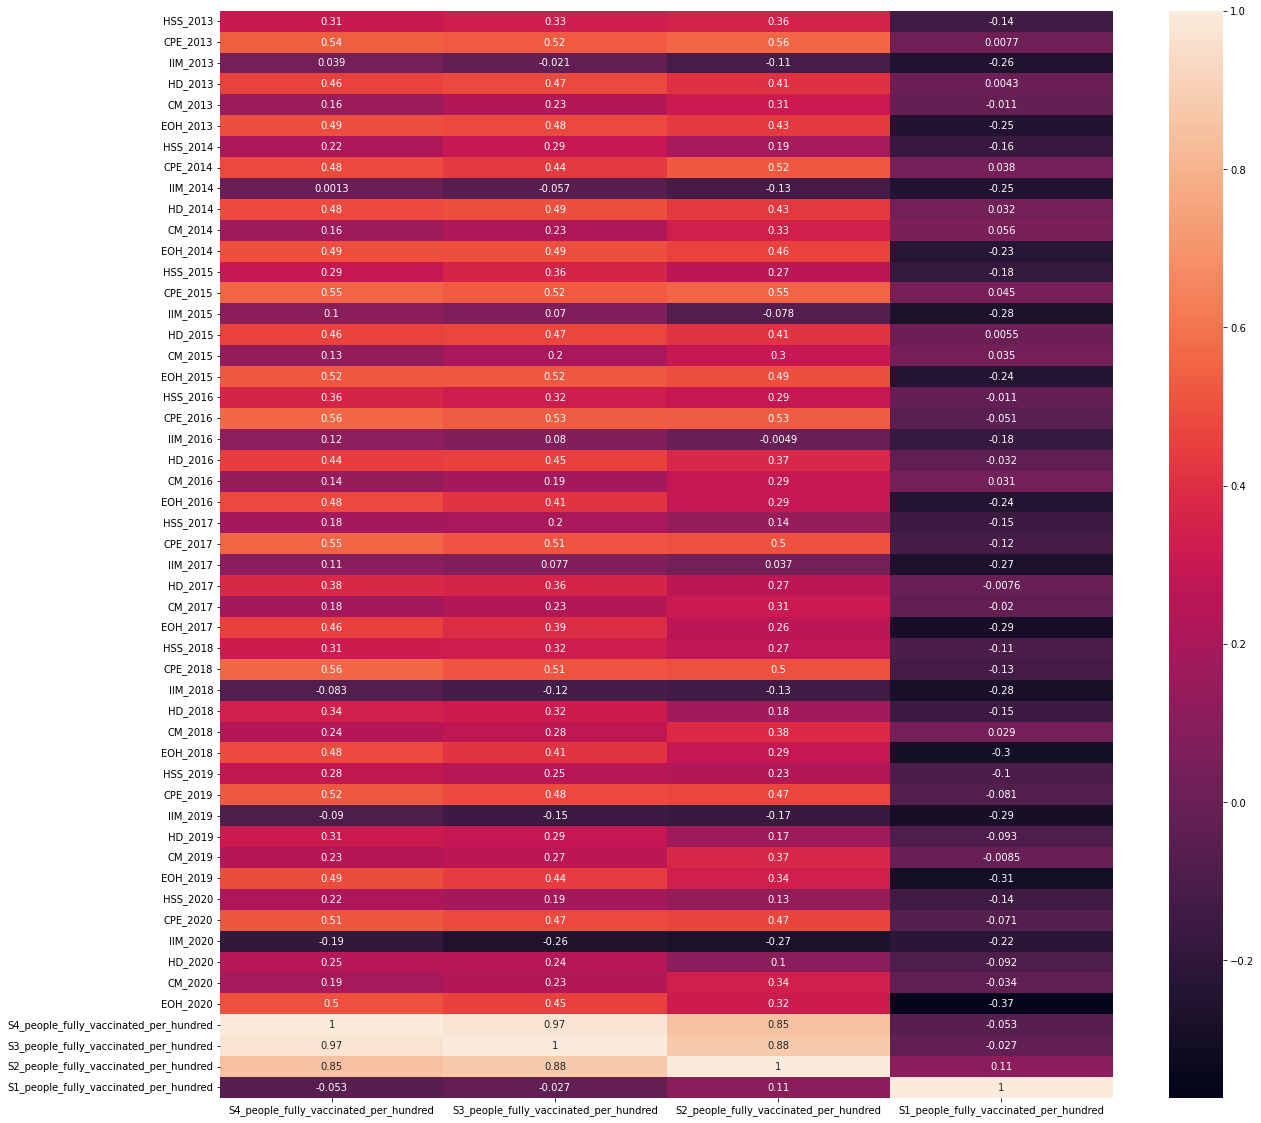

In [23]:
matplotlib.rcParams['figure.figsize'] = [20, 20]
sn.heatmap(corrMatrix_interest, annot=True)
plt.show()

<AxesSubplot:xlabel='STATE'>

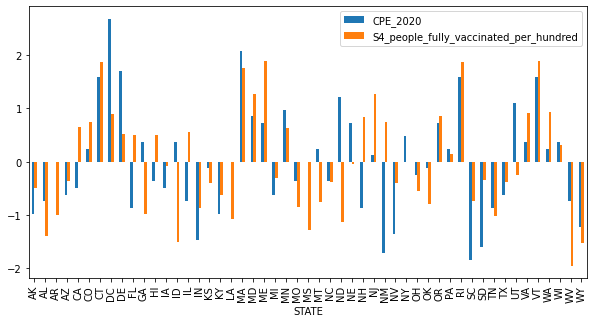

In [24]:
matplotlib.rcParams['figure.figsize'] = [10, 5]
nhspiDF_process.plot(x='STATE',y=['CPE_2020','S4_people_fully_vaccinated_per_hundred'],kind='bar')

<AxesSubplot:xlabel='STATE'>

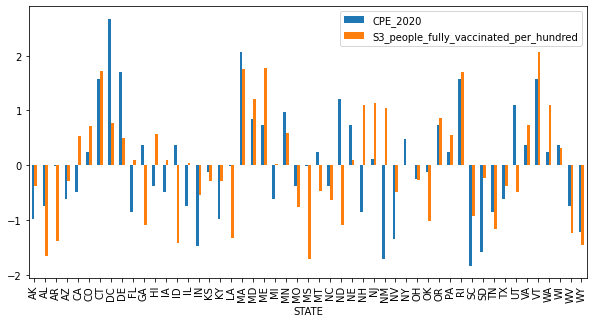

In [25]:
matplotlib.rcParams['figure.figsize'] = [10, 5]
nhspiDF_process.plot(x='STATE',y=['CPE_2020','S3_people_fully_vaccinated_per_hundred'],kind='bar')

<AxesSubplot:xlabel='STATE'>

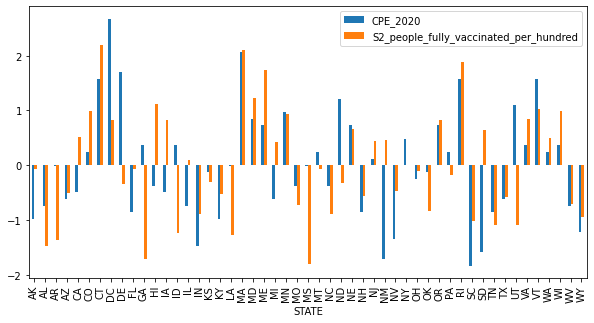

In [26]:
matplotlib.rcParams['figure.figsize'] = [10, 5]
nhspiDF_process.plot(x='STATE',y=['CPE_2020','S2_people_fully_vaccinated_per_hundred'],kind='bar')

<AxesSubplot:xlabel='STATE'>

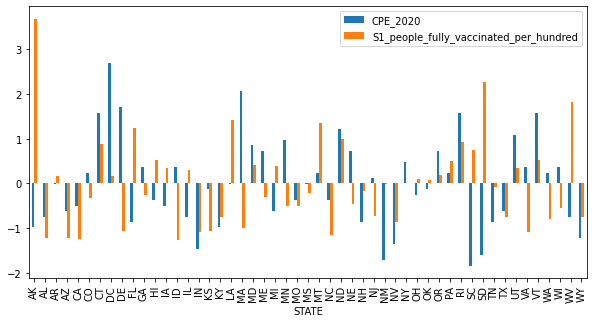

In [27]:
matplotlib.rcParams['figure.figsize'] = [10, 5]
nhspiDF_process.plot(x='STATE',y=['CPE_2020','S1_people_fully_vaccinated_per_hundred'],kind='bar')

# Experiment 2 : Getting States with Good Correlation

In [28]:
c = nhspiDF_process.corr().abs()


In [35]:
nhspiDF_process.head()

,STATE,HSS_2013,CPE_2013,IIM_2013,HD_2013,CM_2013,EOH_2013,HSS_2014,CPE_2014,IIM_2014,...,CPE_2020,IIM_2020,HD_2020,CM_2020,EOH_2020,stateCode,S4_people_fully_vaccinated_per_hundred,S3_people_fully_vaccinated_per_hundred,S2_people_fully_vaccinated_per_hundred,S1_people_fully_vaccinated_per_hundred
0,AK,-1.121005,0.072047,-1.681592,-2.273902,-3.209844,-1.446720,-0.392820,-0.705064,-1.353201,...,-0.983417,-2.229487,-2.016745,-3.310669,-2.043026,AK,-0.487998,-0.387896,-0.072207,3.678680
1,AL,-0.512801,-0.876181,-1.036771,-0.617202,-0.057237,-1.063101,-0.539052,-0.838737,-1.186503,...,-0.739357,-0.443563,0.457938,-1.018667,-0.014207,AL,-1.394196,-1.668977,-1.481057,-1.208169
2,AR,-0.208698,-0.639124,0.736487,0.376818,-0.174000,-1.446720,-0.246587,-1.106085,0.647184,...,-0.007178,0.151745,-0.779404,0.727620,-0.304039,AR,-0.992007,-1.393950,-1.369168,0.163083
3,AZ,-0.360749,-0.046482,-0.230745,-1.942562,-1.458395,-0.679482,-0.392820,-0.972411,-0.019612,...,-0.617327,1.342362,-1.707409,-0.363810,0.710371,AZ,-0.367087,-0.290267,-0.502426,-1.213812
4,CA,-0.968954,-0.165010,0.897692,-0.782872,-1.575158,1.238612,-0.831516,0.364327,0.980581,...,-0.495298,-0.840435,-1.243407,-1.455239,1.290033,CA,0.653659,0.540769,0.521905,-1.230741


In [36]:
s = c.unstack()

In [38]:
so = s.sort_values(kind="quicksort")

In [45]:
so

IIM_2018                                CPE_2019                                  0.000971
CPE_2019                                IIM_2018                                  0.000971
HD_2013                                 EOH_2017                                  0.000975
EOH_2017                                HD_2013                                   0.000975
HSS_2016                                HD_2014                                   0.001010
                                                                                    ...   
EOH_2017                                EOH_2017                                  1.000000
CM_2017                                 CM_2017                                   1.000000
HD_2017                                 HD_2017                                   1.000000
CPE_2019                                CPE_2019                                  1.000000
S1_people_fully_vaccinated_per_hundred  S1_people_fully_vaccinated_per_hundred    1.000000